# Homework 1
## Basic descriptive information and plots for our selected dataset

### Daniel Alonso and Ander Iturburu

#### Data extracted from <a href="https://www.kaggle.com/c/titanic/overview">kaggle titanic dataset challenge</a>

In [15]:
install.packages(c('dplyr', 'fitdistrplus', 'PerformanceAnalytics','reshape2','ggmosaic','vcd','EnvStats'))

Installing packages into ‘/home/dreth/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



In [1]:
library(dplyr)
library(ggplot2)
library(fitdistrplus)
library(PerformanceAnalytics)
library(reshape2)
library(vcd)
library(EnvStats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: grid


Attaching package: ‘vcd’


The following object is masked from ‘package:PerformanceAnalytics’:

    Kappa



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:PerformanceAnalytics’

In [2]:
# setting plot sizes
options(repr.plot.width = 14, repr.plot.height = 8)

In [3]:
# importing data
data = read.csv('data/titanic.csv')

In [4]:
# looking at the data
head(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


<img src="img/definition of variables.png" style="width:500px;">

### VARIABLES:

#### ID:

- PassengerId

#### OTHER:

- Name
- Ticket
- Cabin

#### CONTINUOUS:

- Fare
- Age

#### DISCRETE:

- SibSp
- Sex
- Survived
- Pclass
- parch




#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

note: Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
# ommitting nans
data_n <- na.omit(data)

## Histograms:

In [6]:
# Fare
png(file="./plots/fare_hist.png", width=1200, height=800)
hist(data$Fare)
dev.off()

png 
  2

In [7]:
# Age
png(file="./plots/age_hist.png", width=1200, height=800)
hist(data$Age)
dev.off()

png 
  2

## fitting distributions to data:

In [8]:
# Age
png(file="./plots/age_fitdist.png", width=1200, height=800)
plot(summary(fitdist(data_n$Age,"norm")))
dev.off()

png 
  2

In [9]:
# Age
png(file="./plots/fare_fitdist.png", width=1200, height=800)
plot(summary(fitdist(data_n$Fare+1,"gamma")))
dev.off()

png 
  2

## Quantiles:

In [10]:
# boxplots
png(file="./plots/age_boxplot.png", width=700, height=1200)
options(repr.plot.width = 8, repr.plot.height = 14)
five <- data.frame(x=rep(1,5), five=fivenum(data_n$Age))
ggplot(data=data_n, aes(x=0, y=data_n$Age)) + 
    geom_boxplot() + 
    theme(text = element_text(size=18)) +
    ylab("Age") +
    scale_x_discrete(breaks = NULL) +
    geom_text(data=five, aes(x=0, y=five, label=five),nudge_x =0.5)
dev.off()

png 
  2

In [11]:
# boxplots
png(file="./plots/fare_boxplot.png", width=700, height=1200)
options(repr.plot.width = 8, repr.plot.height = 14)
five <- data.frame(x=rep(1,5), five=fivenum(data_n$Fare))
ggplot(data=data_n, aes(x=0, y=data_n$Fare)) + 
    geom_boxplot() + 
    theme(text = element_text(size=18)) +
    ylab("Fare") +
    scale_x_discrete(breaks = NULL) +
    geom_text(data=five, aes(x=0, y=five, label=five),nudge_x =0.5)
dev.off()

png 
  2

In [12]:
# fare quantiles
png(file="./plots/fare_quants.png", width=800, height=500)
options(repr.plot.width = 14, repr.plot.height = 8)
plot(quantile(data_n$Fare))
dev.off()


png 
  2

In [13]:
# fare quantiles
png(file="./plots/age_quants.png", width=800, height=500)
options(repr.plot.width = 14, repr.plot.height = 8)
plot(quantile(data_n$Age))
dev.off()


png 
  2

## relationships between variables: correlations

In [14]:
# age vs fare
png(file="./plots/fare_vs_age_scatter_log.png", width=800, height=500)
log_data_n = data_n %>% mutate(logAge = log(Age), logFare = log(Fare+100))
ggplot(data=log_data_n, aes(x=logFare, y=logAge)) + 
    geom_point() +
    theme(text = element_text(size=18))
dev.off()


png 
  2

In [15]:
# checking correlation between the variables using a spearman correlation coefficient
cols <- data_n %>% dplyr::select(Age, Fare)
cor(cols, method="spearman")

,Age,Fare
Age,1.0000000,0.1350512
Fare,0.1350512,1.0000000


In [16]:
# checking correlation for all the numerical variables using a performance analytics plot
png(file="./plots/fare_vs_age_performanceanalytics.png", width=800, height=500)
pa <- data_n %>% dplyr::select(Age, Fare)
chart.Correlation(pa, histogram=TRUE, pch=19, method="spearman")
dev.off()

Warning message in cor.test.default(as.numeric(x), as.numeric(y), method = method):
“Cannot compute exact p-value with ties”


png 
  2

## categorical variables

#### grouping by month

In [17]:
# sumarizing temp, wind and relative humidity by mean
months <- data %>% group_by(month) %>% summarize(temp = mean(temp), wind = mean(wind), RH = mean(RH))

ERROR: Error: Must group by variables found in `.data`.
* Column `month` is not found.


In [ ]:
# replace month names by month number to sort by month and 
# prepare a chronologically ordered time series
for (m in month.name) {
  months$month[months$month == tolower(substring(m,1,3))] <- which(m == month.name)
}

# order by month
months <- months %>% mutate(month = as.numeric(month)) %>% arrange(month)

In [ ]:
# melting the dataframe for easier plotting of multiple lines
months <- melt(months, id.vars=c("month"), measure.vars=c("temp","wind","RH"))

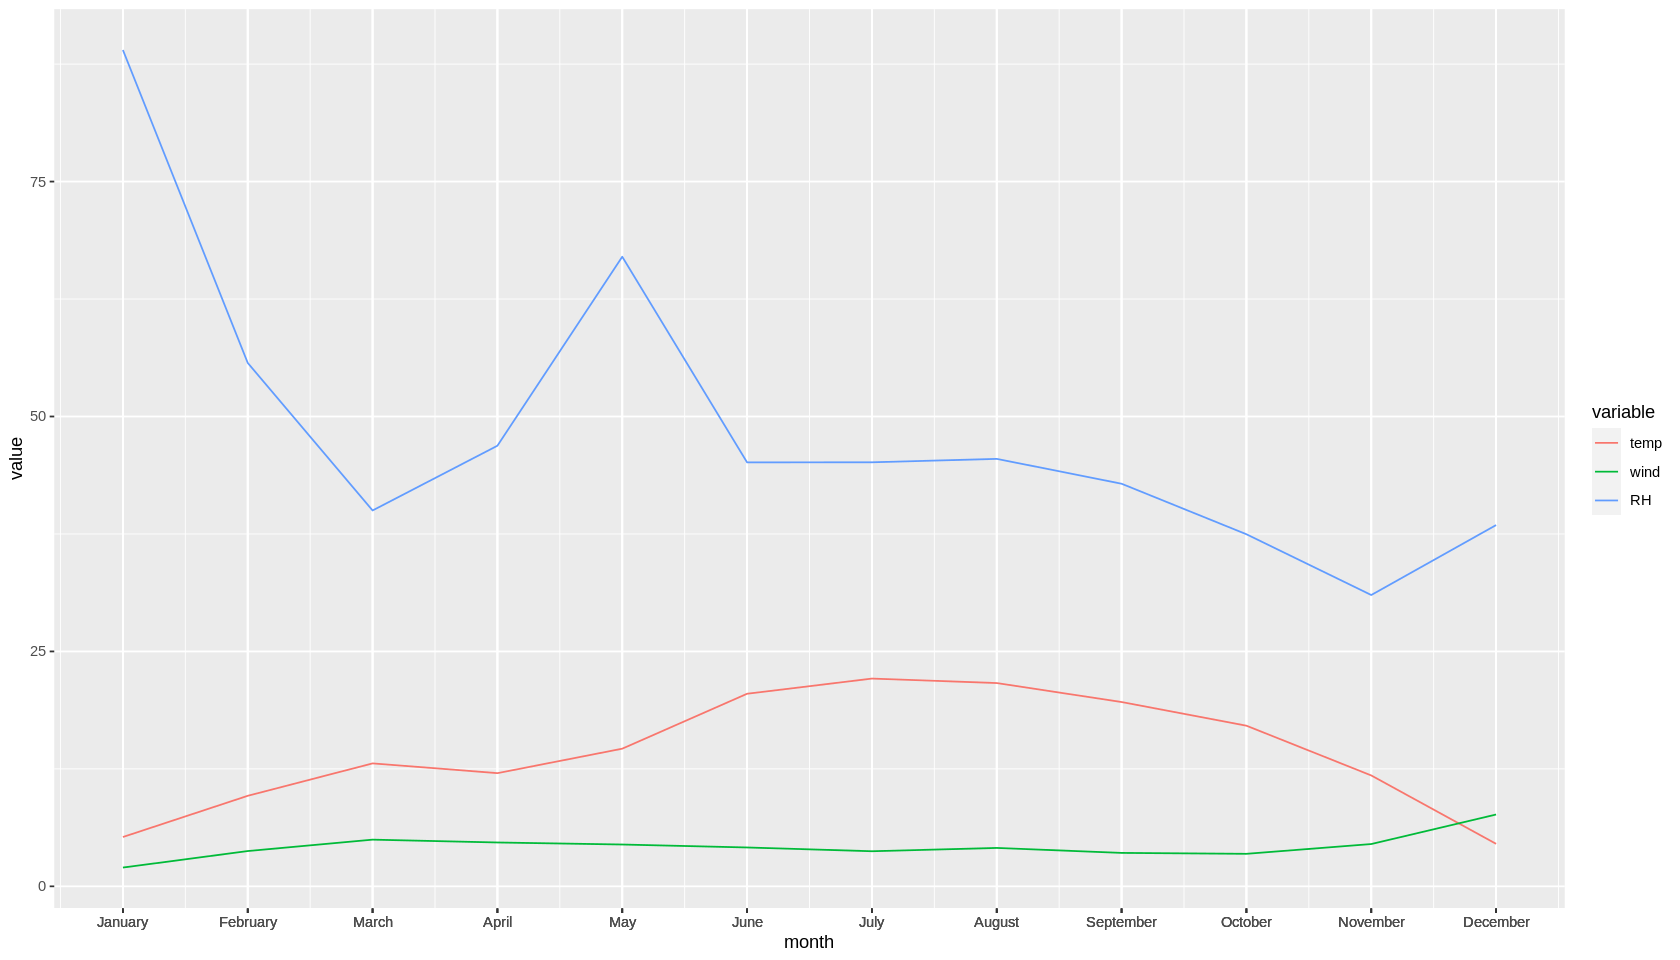

In [ ]:
# plotting lines for the 3 variables selected
ggplot(months, aes(x=month, y=value, colour=variable)) + 
  geom_line() +
  scale_x_continuous("month", labels=rep(month.name, 3), breaks=months$month)

We can see that relative humidity seems to spike around spring and temps rise in the months corresponding to summer and drops sharply around november-december

If we excluded the value for relative humidity, the scale for temperature and wind speed would appear more drastically, as follows

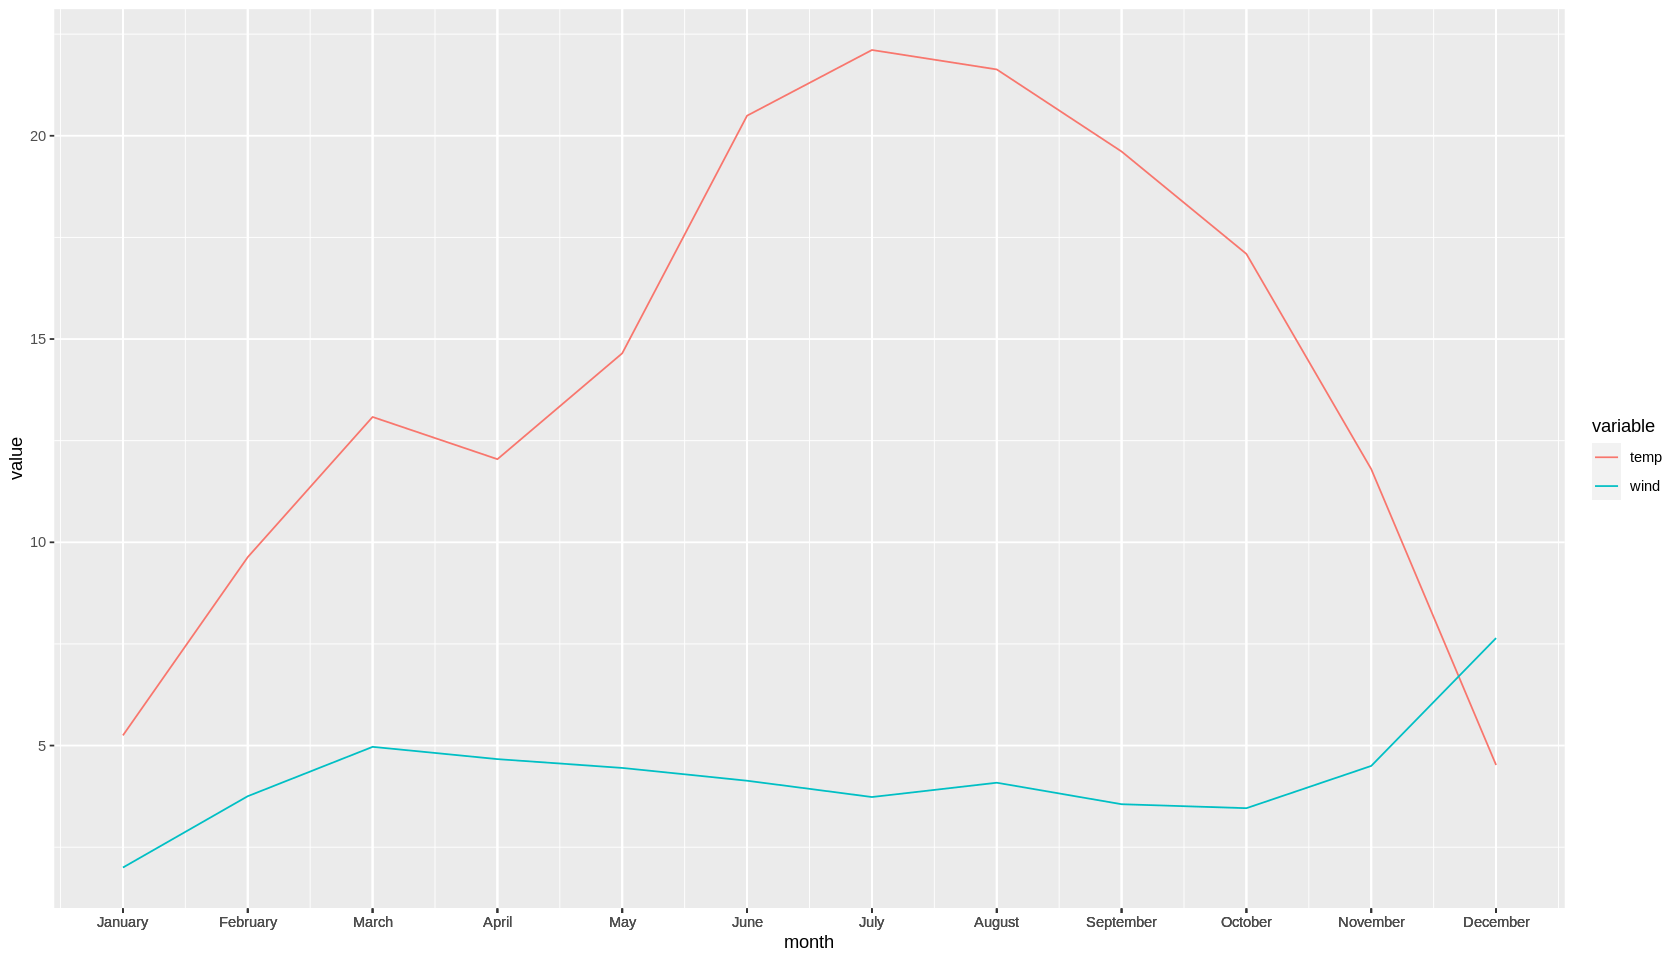

In [ ]:
# excluding the relative humidity variable in order to modify the scale
ggplot(months %>% filter(variable != "RH"), aes(x=month, y=value, colour=variable)) + 
  geom_line() +
  scale_x_continuous("month", labels=rep(month.name, 3), breaks=months$month)

Here we can notice that the drop in temperature past october resembles much more the temperatures around January and February

Wind speed sees an interesting pattern where the wind is significantly increased around the start of winter.

In [ ]:
# counting entries by month to assess which month has most forest fires
counts <- data %>% mutate(month = trimws(month)) %>% group_by(month) %>% tally(X)

# replace month names by month number to sort by month and 
# prepare a chronologically ordered time series
for (m in month.name) {
  counts$month[counts$month == tolower(substring(m,1,3))] <- which(m == month.name)
}

# order by month
counts <- counts %>% mutate(month = as.numeric(month)) %>% arrange(month)
counts

month,n
<dbl>,<dbl>
1,6
2,103
3,255
4,52
5,10
6,107
7,167
8,825
9,754


We can see the numbers, but let's visualize it to see it more clearly

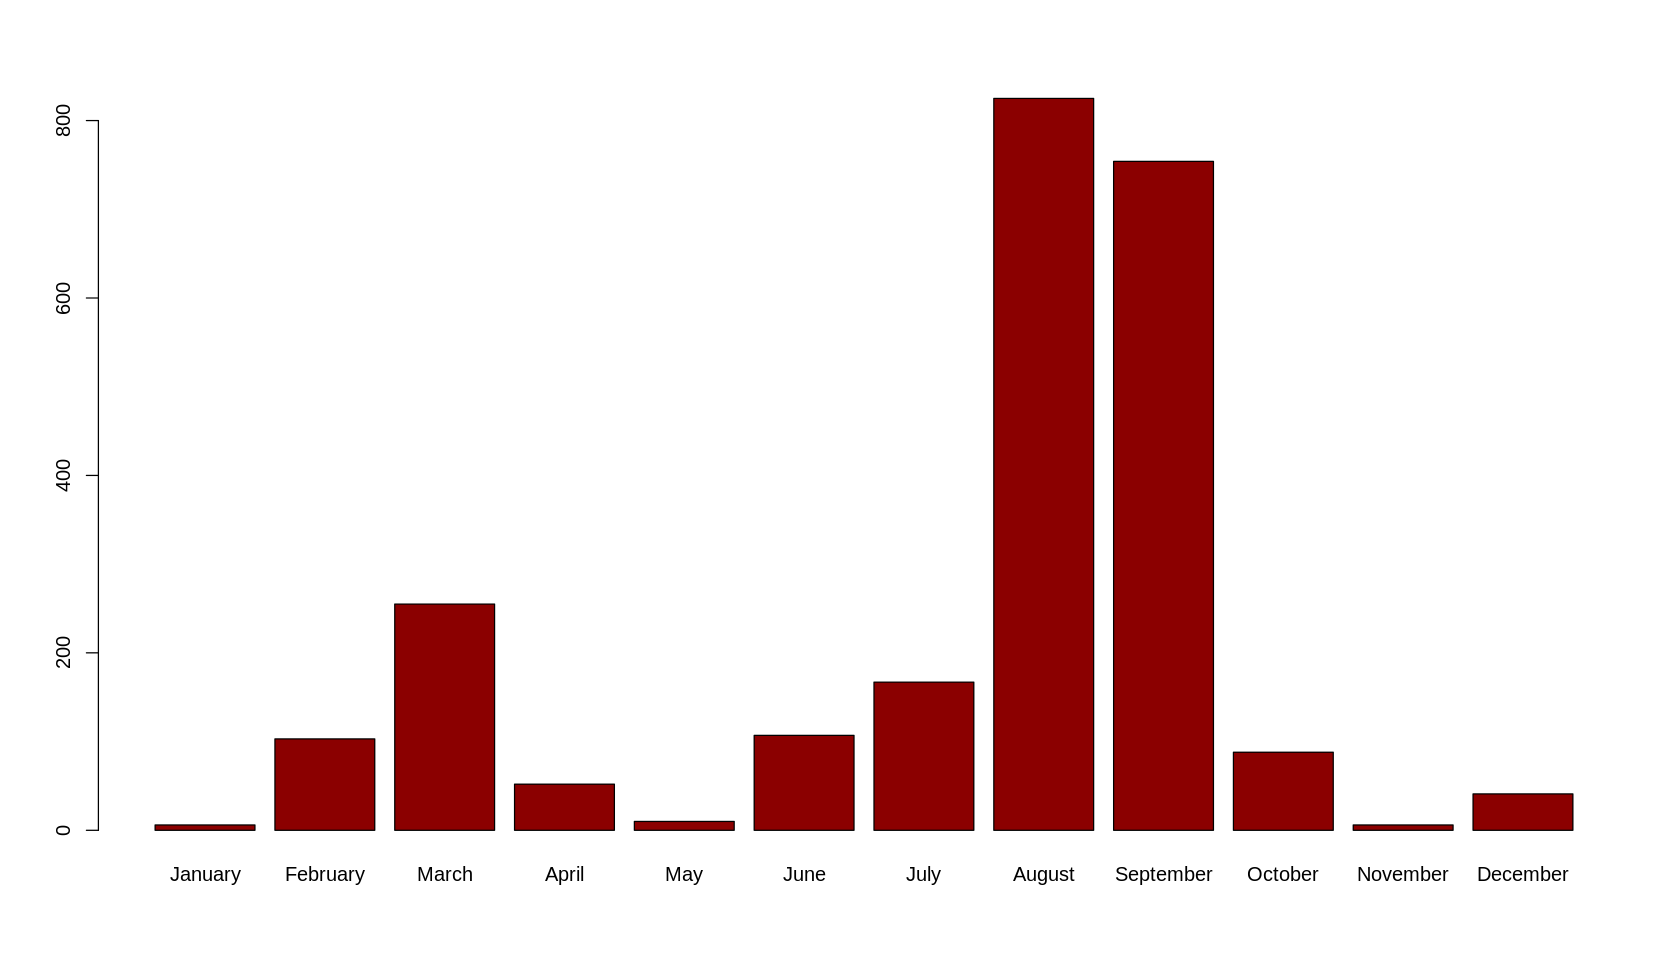

In [ ]:
# creating a barplot to count the months
bp = barplot(counts$n, names.arg=month.name, col="darkred")

We can see the rainiest months (april and may) seem to have considerably lower fires along with november or january given the presumably low temperatures, with december being significantly higher than the rest of the winter given that it seems to be the windiest month of the year.

August and september by far top the months with the most fires. Probably given that August is the hottest summer month and September might have to carry on with the fires occurring in August, therefore, incidence might be just as high due to difficulty controlling the fires.

#### grouping by weekday

We might be able to observe interesting patterns like this by looking at a similar metric by weekday

We prepare a mosaic plot to view fires by weekday

In [ ]:
# counting entries by weekday to assess which day has most forest fires
cnts <- data %>% mutate(day = trimws(day), month = trimws(month)) %>% group_by(day, month) %>% tally(X)

# weekdays
weekday = c('mon','tue','wed','thu','fri','sat','sun')

# replacing weekdays with their respective number to order
i = 0
for (wkday in weekday) {
  i = i+1
  cnts$day[cnts$day == wkday] <- i
}
# replace month names by month name 
i = 0
for (m in month.name) {
  i = i + 1
  cnts$month[cnts$month == tolower(substring(m,1,3))] <- i
}
cnts <- cnts %>% mutate(month = as.numeric(month))

# ordering
cnts <- cnts %>% arrange(day, month)

# replacing back
i = 0
for (wkday in weekday) {
  i = i+1
  cnts$day[cnts$day == i] <- wkday
}
i = 0
for (m in month.name) {
  i = i + 1
  cnts$month[cnts$month == i] <- m
}

In [ ]:
head(cnts)

day,month,n
<chr>,<chr>,<dbl>
mon,February,15
mon,March,54
mon,April,6
mon,June,20
mon,July,25
mon,August,79


ERROR while rich displaying an object: Error: stat_count() can only have an x or y aesthetic.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

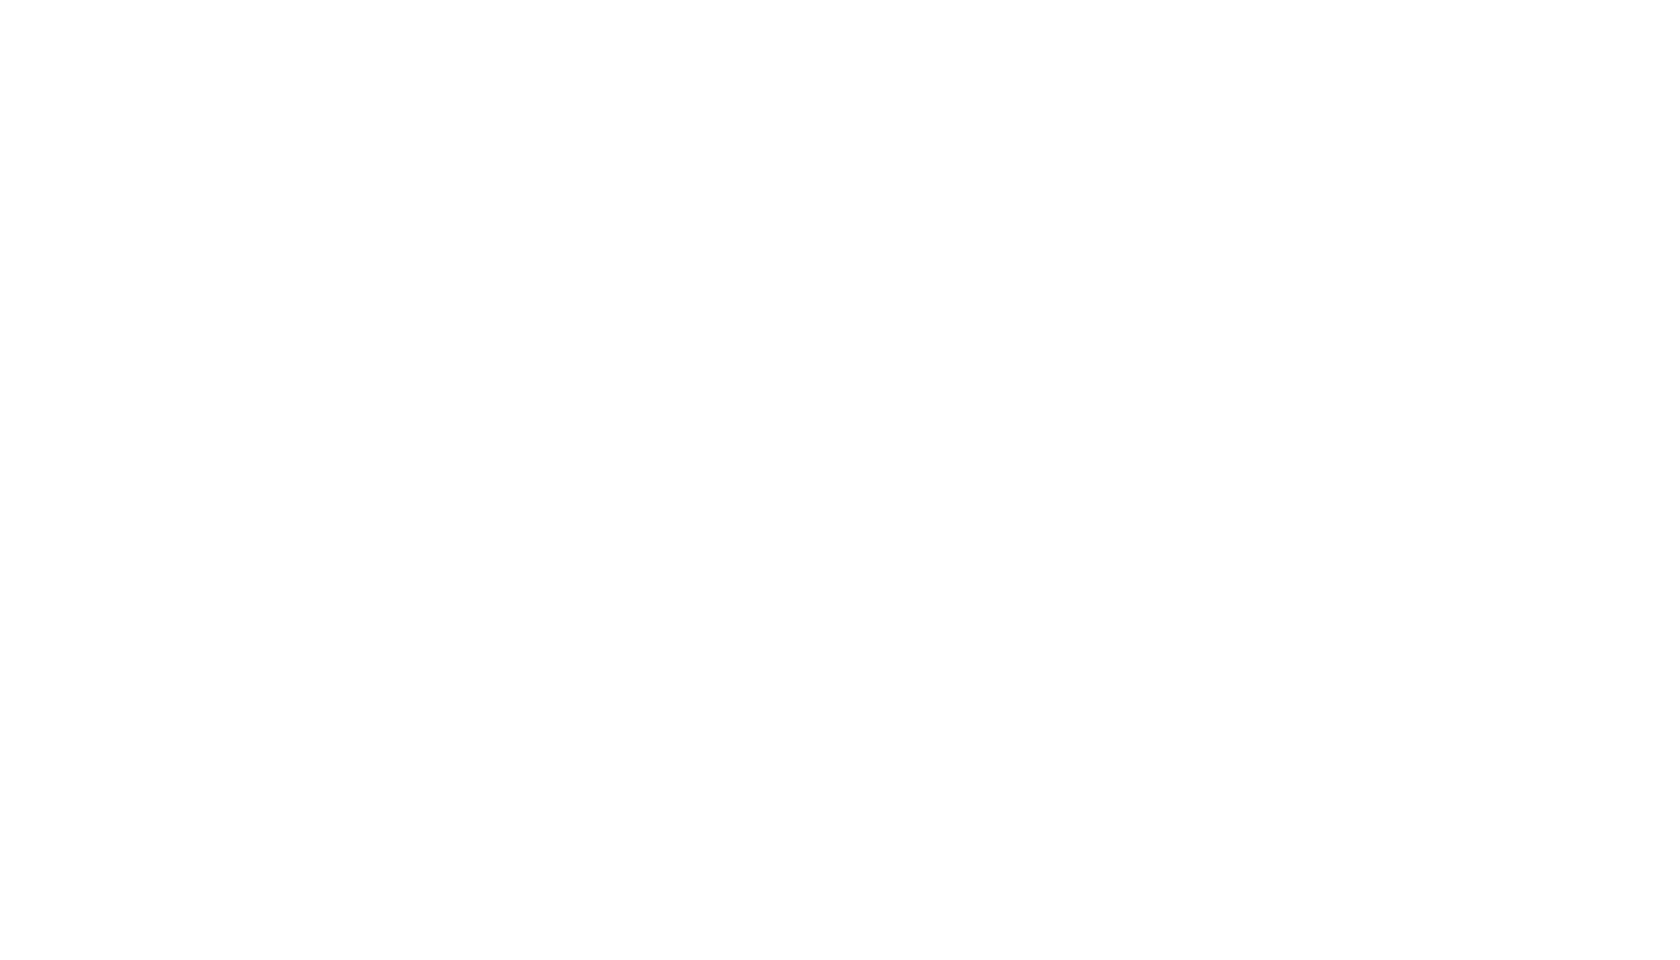

In [ ]:
ggplot(cnts, aes(x=month, y=n, fill=day)) + geom_bar()